# Week 2 - Project 1
###### Team 5 - Sanjivek & Georgia

### Goal: Identify and load a network dataset (that has categorical information per node). For each of the nodes , calculate degree centrality and eigenvector centrality. Compare centrality measures across categorical groups.

#### Books About US Politics: A network of books about US politics published around the time of the 2004 presidential election and sold by the online bookseller Amazon.com. Edges between books represent frequent copurchasing of books by the same buyers. The network was compiled by V. Krebs and is unpublished, but can found on Krebs' web site. Thanks to Valdis Krebs for permission to post these data on this web site. 

##### Import data

In [64]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import community
%matplotlib inline

ImportError: No module named community

In [65]:
L = nx.read_gml('polbooks.gml',relabel=True)
L

##### Print Nodes and Edges

In [66]:
print "Nodes:", L.number_of_nodes()
print "Edges:", L.number_of_edges()

Nodes: 105
Edges: 441


##### With 105 nodes and 441 edges, draw a network graph using spring layout 

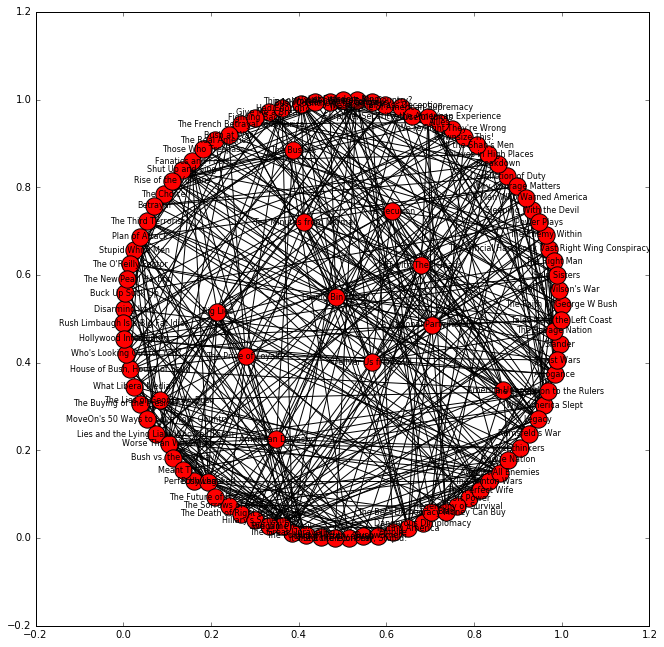

In [39]:
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))
pos = nx.spring_layout(L, scale=1.0, k=5*default_distance_between_nodes)
nx.draw_networkx(L, pos, node_size=300, font_size=8)

##### Calculate Degree of Centrality for books and print out a top 10 list

In [40]:
def sorted_map(map):
    ms= sorted(map.iteritems(),key=lambda(k,v):(-v,k))
    return ms

In [41]:
#Compute Degree Of Centrality
d = nx.degree(L)
ds = sorted_map(d)
ds[0:9]

[(u'A National Party No More', 25),
 (u'Off with Their Heads', 25),
 (u'Bushwhacked', 23),
 (u'Losing Bin Laden', 23),
 (u'American Dynasty', 22),
 (u'Big Lies', 21),
 (u'The Great Unraveling', 21),
 (u'The Price of Loyalty', 20),
 (u'Arrogance', 18)]

##### Log graph of the top 10 degree centrality books

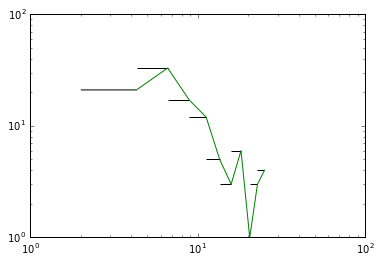

In [42]:
h= plt.hist(d.values(),10)
plt.loglog(h[1][1:],h[0])

#### View graph of books (colored based on category)

In [43]:
values = [part.get(node) for node in K_ud.nodes()]
plt.figure(figsize=(10,10))
pos=nx.drawing.spring_layout(K_ud)
nx.draw(K_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

NameError: name 'K_ud' is not defined

In [67]:
# Examine node data
print K_ud.nodes(data=True)[0:5]

NameError: name 'K_ud' is not defined

#### Taking a look at each category (Liberal, Conservative, Neutral)

In [44]:
Liberal=[]
Conservative=[]
Neutral=[]

for i,j in L.nodes_iter(data=True):
    if j['value']=='l':
        Liberal.append(i)
    elif j['value']=='n':
        Neutral.append(i)
    elif j['value']=='c':
        Conservative.append(i)

##### Liberal Subgraph

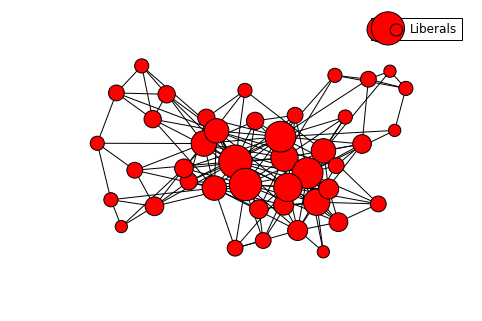

In [45]:
L_lib= L.subgraph(Liberal)
d = nx.degree(L_lib)
nx.draw_spring(L_lib, label = 'Liberals', node_color='r', node_size=[v * 50 for v in d.values()])
plt.legend(["Liberals"])
plt.show()

##### Conservative Subgraph

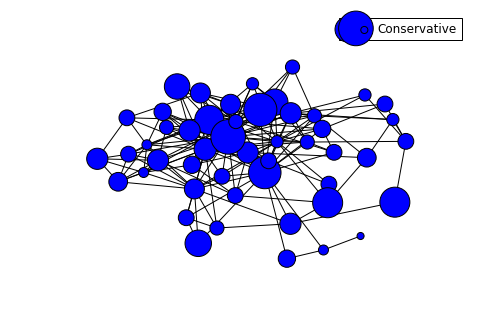

In [46]:
L_con= L.subgraph(Conservative)
d = nx.degree(L_con)
nx.draw_spring(L_con, label = 'Conservative', node_color='b', node_size=[v * 50 for v in d.values()])
plt.legend(["Conservative"])
plt.show()

##### Neutral Subgraph

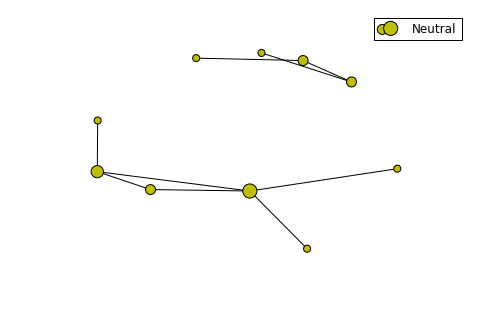

In [47]:
L_neu= L.subgraph(Neutral)
d = nx.degree(L_neu)
nx.draw_spring(L_neu, label = 'Neutral', node_color='y', node_size=[v * 50 for v in d.values()])
plt.legend(["Neutral"])
plt.show()

#### Creating centrality tables that include political stance of books 

In [115]:
from prettytable import PrettyTable

dcent=nx.degree_centrality(L)
dcent_s=sorted_map(dcent)

ccent=nx.closeness_centrality(L)
ccent_s=sorted_map(ccent)

bcent = nx.betweenness_centrality(L)
bcent_s = sorted_map(bcent)

ecent = nx.nx.eigenvector_centrality_numpy(L)
ecent_s = sorted_map(ecent)

names1=[x[0] for x in dcent_s[:10]]
names2=[x[0] for x in ccent_s[:10]]
names3=[x[0] for x in bcent_s[:10]]
names4=[x[0] for x in ecent_s[:10]]

names=list(set(names1)|set(names2)|set(names3)|set(names4))

table=[[name,L.degree(name),round(dcent[name],3),round(ccent[name],3),round(bcent[name],3),round(ecent[name],3),L.node[name]['value']] for name in names]

table=sorted(table,key=lambda x: -x[5])
pt = PrettyTable(['Node','Degree','Degree Cent.','Closeness Cent.','Betweenness Cent.','Eigen Cent.','Value'])
for i in range(0, len(table)):
    pt.add_row(table[i])

print pt

+----------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|                  Node                  | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. | Eigen Cent. | Value |
+----------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|              Bushwhacked               |   23   |    0.221     |      0.364      |       0.058       |    0.297    |   l   |
|                Big Lies                |   21   |    0.202     |       0.35      |       0.043       |    0.284    |   l   |
|            American Dynasty            |   22   |    0.212     |      0.394      |       0.091       |    0.271    |   l   |
|          The Price of Loyalty          |   20   |    0.192     |      0.414      |       0.139       |    0.259    |   l   |
|          The Great Unraveling          |   21   |    0.202     |      0.371      |       0.065       |    0.2

In [110]:
# Create function to generate categorical tables

def productstats(L):
    dcent=nx.degree_centrality(L)
    dcent_s=sorted_map(dcent)

    ccent=nx.closeness_centrality(L)
    ccent_s=sorted_map(ccent)

    bcent = nx.betweenness_centrality(L)
    bcent_s = sorted_map(bcent)

    ecent = nx.eigenvector_centrality_numpy(L)
    ecent_s = sorted_map(ecent)

    names1=[x[0] for x in dcent_s[:10]]
    names2=[x[0] for x in ccent_s[:10]]
    names3=[x[0] for x in bcent_s[:10]]
    names4=[x[0] for x in ecent_s[:10]]

    names=list(set(names1)|set(names2)|set(names3)|set(names4))

    table=[[name,L.degree(name),round(dcent[name],3),round(ccent[name],3),round(bcent[name],3),round(ecent[name],3),L.node[name]['value']] for name in names]

    table=sorted(table,key=lambda x: -x[5])
    pt = PrettyTable(['Node','Degree','Degree Cent.','Closeness Cent.','Betweenness Cent.','Eigen Cent.','Value'])
    for i in range(0, len(table)):
        pt.add_row(table[i])
    
    print pt

In [111]:
# Neutral Category
productstats(L_neu)

+---------------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|                     Node                    | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. | Eigen Cent. | Value |
+---------------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|              Why America Slept              |   4    |    0.333     |      0.347      |       0.106       |    0.599    |   n   |
|           Sleeping With the Devil           |   3    |     0.25     |      0.298      |       0.061       |    0.518    |   n   |
|            1000 Years for Revenge           |   2    |    0.167     |       0.26      |        0.0        |    0.457    |   n   |
|                  Ghost Wars                 |   1    |    0.083     |      0.208      |        0.0        |    0.245    |   n   |
|                 Meant To Be                 |   1    |    0.083     |     

In [112]:
# Conservative Category
productstats(L_con)

+----------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|            Node            | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. | Eigen Cent. | Value |
+----------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|  A National Party No More  |   24   |     0.5      |      0.649      |       0.134       |    0.344    |   c   |
|    Off with Their Heads    |   22   |    0.458     |      0.632      |       0.138       |    0.316    |   c   |
|      Losing Bin Laden      |   21   |    0.438     |      0.632      |       0.221       |    0.272    |   c   |
|           Legacy           |   18   |    0.375     |      0.593      |       0.096       |    0.262    |   c   |
|         Arrogance          |   17   |    0.354     |      0.545      |       0.048       |    0.251    |   c   |
|    Deliver Us from Evil    |   18   |    0.375     |      0.539      |        

In [113]:
# Liberal Category
productstats(L_lib)

+----------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|                  Node                  | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. | Eigen Cent. | Value |
+----------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|              Bushwhacked               |   22   |    0.524     |      0.656      |       0.147       |    0.328    |   l   |
|                Big Lies                |   21   |     0.5      |      0.656      |       0.147       |    0.324    |   l   |
|            American Dynasty            |   19   |    0.452     |      0.618      |       0.102       |    0.282    |   l   |
|          The Great Unraveling          |   19   |    0.452     |      0.646      |       0.153       |    0.274    |   l   |
|       The Lies of George W. Bush       |   16   |    0.381     |      0.592      |       0.052       |    0.2

In [54]:
# Centrality
dcl=nx.degree_centrality(L_lib)
ccl=nx.closeness_centrality(L_lib)
bcl=nx.betweenness_centrality(L_lib)
ecl=nx.eigenvector_centrality_numpy(L_lib)

dcc=nx.degree_centrality(L_con)
ccc=nx.closeness_centrality(L_con)
bcc=nx.betweenness_centrality(L_con)
ecc=nx.eigenvector_centrality_numpy(L_con)

dcn=nx.degree_centrality(L_neu)
ccn=nx.closeness_centrality(L_neu)
bcn=nx.betweenness_centrality(L_neu)
ecn=nx.eigenvector_centrality_numpy(L_neu)

#### ANOVA testing for each centrality measure across categories

##### Degree centrality

In [55]:
dcla=[]
dcca=[]
dcna=[]

for key, value in dcl.items():
    dcla.append(value)
    
for key, value in dcc.items():
    dcca.append(value)
    
for key, value in dcn.items():
    dcna.append(value)


In [56]:
# compute one-way ANOVA for DEGREE CENTRALITY  P value (p > 0.05, not statistically different)  
from scipy import stats  
      
f_val, p_val_DC = stats.f_oneway(dcla, dcca, dcna)  
  
print "One-way ANOVA P =", p_val_DC

One-way ANOVA P = 0.118827939231


##### Closeness centrality

In [57]:
ccla=[]
ccca=[]
ccna=[]

for key, value in dcl.items():
    ccla.append(value)
    
for key, value in ccc.items():
    ccca.append(value)
    
for key, value in ccn.items():
    ccna.append(value)

In [75]:
# compute one-way ANOVA P value (p > 0.05, not statistically different)  
from scipy import stats  
      
f_val, p_val_CC = stats.f_oneway(ccla, ccca, ccna)  
  
print "One-way ANOVA P =", p_val_CC

One-way ANOVA P = 6.28366765523e-25


##### Betweenness centrality

In [59]:
bcla=[]
bcca=[]
bcna=[]

for key, value in bcl.items():
    bcla.append(value)
    
for key, value in bcc.items():
    bcca.append(value)
    
for key, value in bcn.items():
    bcna.append(value)

In [60]:
# compute one-way ANOVA P value (p > 0.05, not statistically different)  
from scipy import stats  
      
f_val, p_val_BC = stats.f_oneway(bcla, bcca, bcna)  
  
print "One-way ANOVA P =", p_val_BC

One-way ANOVA P = 0.776634720915


##### Eigenvector centrality

In [61]:
ecla=[]
ecca=[]
ecna=[]

for key, value in ecl.items():
    ecla.append(value)
    
for key, value in ecc.items():
    ecca.append(value)
    
for key, value in ecn.items():
    ecna.append(value)

In [62]:
# compute one-way ANOVA P value (p > 0.05, not statistically different)  
from scipy import stats  
      
f_val, p_val_EC = stats.f_oneway(ecla, ecca, ecna)  
  
print "One-way ANOVA P =", p_val_EC

One-way ANOVA P = 0.244352676527


##### Table of ANOVA of centralities and their p-values

In [69]:
p_val = pd.DataFrame({'pVal':[p_val_DC,p_val_CC,p_val_BC,p_val_EC]})
p_val=p_val.rename({0:'Degree Centrality',1: 'Closeness Centrality', 2: 'Betweenness Centrality',3:'Eigenvector Centrality'})
p_val

,pVal
Degree Centrality,1.188279e-01
Closeness Centrality,6.283668e-25
Betweenness Centrality,7.766347e-01
Eigenvector Centrality,2.443527e-01


### Conclusion: 

#### Comparing centralities:
DEGREE - of the three categories, neutral books had a fewer degree  than either liberal or conservative, which may be due to the smaller size of the neutral books published, yet despite that their degree centrality wasn't too far below that of both the liberal and conservative books. This shows that despite its smaller size, the neutral pool is just as well-connected within its group as the other two larger parties.

CLOSENESS - neutral books are significantly lower in terms of closeness centrality than either liberals or conservatives. Looking at the subgraphs of each category, this could indicate that the neutral books are not popular or are equally popular among themselves, therefore lowering the closeness centrality value (which I assume would have been higher based on the smaller size of the neutral pool).

BETWEENNESS - all three categories have low betweenness values, with neutral being the lowest. It would appear that not many books act as "bridges" that lead to other books.

EIGENVECTOR - not many of the neutral books have a high eigenvector centrality, but the ones that do have higher values than both conservative and liberal ones. This implies that in the neutral pools, the "centrality" of books is more prominent than in the other two categories. However, from looking at the subgraphs, this could be explained by the neutral books' small size, meaning that a "central" book is deemed more "central" simply because the other books aren't.

#### ANOVA:
A one-way between subjects ANOVA was conducted to compare the effect of political stance of books (neutral, liberal, conservative) on centrality measures (degree centrality, closeness centrality, betweenness centrality, eigenvector centrality). There did not appear to be a difference in the centrality means for degree, betweenness or eigenvector centrality, however there was a significant effect of political stance on closeness centrality (p-value of [6.28 x 10^-25] < 0.05) indicating that customers who buy from one category are likely to buy more or less of the same books depending on which category they bought from. In other words, customers of (most likely) neutral books may be more likely than conservatives or liberals to buy other neutral books.